# Distribuição Normal

Neste ponto do curso, você já deve conhecer algumas distribuições, como a Binomial, Poisson e a Exponencial. Cada uma delas serve para modelar uma situação diferente. A Distribuição Normal surge também em uma situação específica, que vamos modelar abaixo.

O problema com o qual estamos lidando é o de estimar propriedades de outras distribuições. Por exemplo: queremos modelar o número de buracos numa estrada usando uma distribuição Poisson. Para isso, precisamos *estimar* o parâmetro $\lambda$ - e a maneira mais simples para isso é contar os buracos em um trecho da estrada.

Ao estimar os parâmetros da distribuição desta maneira, veja o que pode estar acontecendo. Vamos supor que exista um parâmetro real $\lambda$ da nossa distribuição Poisson. Quando contamos os buracos num trecho de estrada, estamos atuando sobre uma *amostra* dessa distribuição, e gerando um parâmetro estimado $\hat{\lambda}$. Dependendo do acaso, pode ser que nossa amostra tenha um número de buracos que nos leve a uma estimativa especialmente distante de $\lambda$. Lembre-se da distribuição:

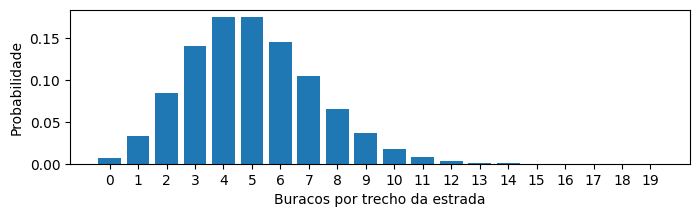

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt

lambda_real = 5
plt.figure(figsize=(8,2))
plt.bar(range(20), stats.poisson.pmf(range(20), lambda_real))
plt.xticks(range(20))
plt.xlabel('Buracos por trecho da estrada')
plt.ylabel('Probabilidade')
plt.show()

A PMF da distribuição Poisson nos informa que, mesmo que tenhamos na realidade $\lambda=5$ buracos por trecho da estrada, existe uma chance bem grande de, à partir de um trecho específico, encontremos um número bem diferente de buracos, e acabamos estimando o parâmetro $\hat{\lambda}=3$.

A ideia que temos então é a seguinte: vamos estimar nossa média de buracos $\hat{\lambda}$ em vários trechos da estrada, e então tirar a média dessas médias. Em outras palavras:

* Sabemos que a média da distribuição Poisson é igual ao parâmetro $\lambda$
* Calculamos a média *amostral* em várias amostras da distribuição Poisson
* Tiramos a média dessas médias todas

Ou:

$$
\bar{X} = \frac{1}{N} \sum_n \bar{x_n}
$$

In [67]:
import scipy.stats as stats
import matplotlib.pyplot as plt

lambda_real = 5
numero_de_trechos = 1
contagens = stats.poisson.rvs(lambda_real, size=numero_de_trechos) # Observei varios trechos da estrada
estimativa_media = contagens.mean() # Esse é o X-barra!
print(estimativa_media)

3.0


Observe o que acontece quando observamos mais trechos! Se tudo der certo, ao aumentar o número de trechos observados, o desvio típico da nossa estimativa diminui!

Na verdade, essa estimativa que vem da média de outras médias segue uma distribuição Normal com média $\mu$ e variância $\sigma^2/N$, ou, em notação matemática:

$$
\bar{X} \sim N\left(\mu,\frac{\sigma^2}{N}\right),
$$
onde:

* $\mu$ é a média real da distribuição que gerou as amostras $x_n$
* $\sigma^2$ é a variância real da distribuição que gerou as amostras $x_n$

O nome desse resultado é **Teorema Central do Limite** ou **Teorema do Limite Central**.

# Exercício 1
*Objetivo: relacionar o surgimento de uma Normal a seus parâmetros matemáticos*

Pela nossa discussão anterior, sabemos que:

* $\bar{X} = \frac{1}{N} \sum_{n=1}^{N} \bar{x_n}$
* $\bar{X} \sim N\left(\mu,\frac{\sigma^2}{N}\right)$

1. Execute o código abaixo. Que variáveis correspondem a:

* $x_n$
* $N$
* $\mu$
* $\sigma$
* $\bar{X}$

2. Que variável deve ser modificada para que aumentemos o número de vezes que observamos o fenômeno?

3. Modifique o código para que passemos a observar não mais o número de buracos numa estrada, mas sim a distância que há entre dois buracos. Lembre-se que na distribuição exponencial a média não é $\lambda$, e sim $\mu=1/\lambda$.

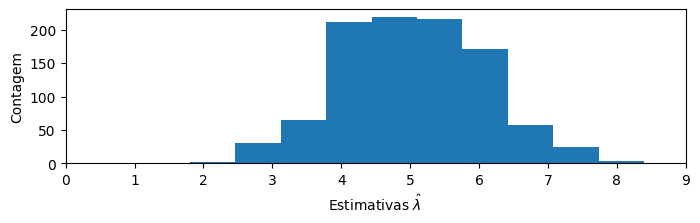

In [68]:
import scipy.stats as stats
import matplotlib.pyplot as plt

lambda_real = 5
numero_de_trechos = 5
n_estimativas = 1000
estimativas = []
for _ in range(n_estimativas):    
    contagens = stats.poisson.rvs(lambda_real, size=numero_de_trechos) # Observei varios trechos da estrada
    estimativa_media = contagens.mean() # Esse é o X-barra!
    estimativas.append(estimativa_media)

plt.figure(figsize=(8,2))
plt.hist(estimativas, bins=10)
plt.xlabel('Estimativas $\hat{\lambda}$')
plt.xticks(range(10))
plt.ylabel('Contagem')
plt.show()

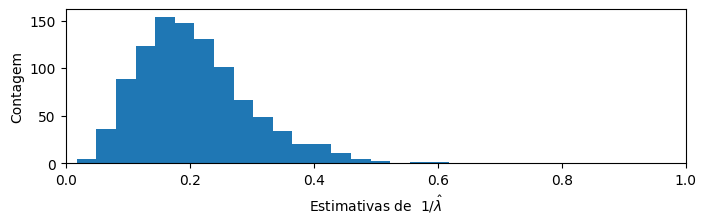

In [69]:
# Soluções:
# 1 
# xn = contagens
# N = numero_de_trechos
# mu = sigma = lambda_real
# Xbarra = estimativa_media

# 2
# Devemos aumentar o numero_de_trechos

# 3
import scipy.stats as stats
import matplotlib.pyplot as plt

lambda_real = 5
numero_de_trechos = 5
n_estimativas = 1000
estimativas = []
for _ in range(n_estimativas):    
    contagens = stats.expon.rvs(scale=1/lambda_real, size=numero_de_trechos) # Observei varios trechos da estrada
    estimativa_media = contagens.mean()
    estimativas.append(estimativa_media)

plt.figure(figsize=(8,2))
plt.hist(estimativas, bins=20)
plt.xlabel('Estimativas de  $1/\hat{\lambda}$')
plt.xlim([0,1])
plt.ylabel('Contagem')
plt.show()

# Exercício 2
*Objetivo: usar a distribuição Normal para calcular probabilidades*

A distribuição normal, no pacote Scipy, é usada como:

`st.norm.cdf(loc=mu, scale=sigma)`

Por exemplo:

In [70]:
import scipy.stats as st
# P(X >= 5), se mu=4, sigma=2
p1 = 1-st.norm.cdf(5, loc=4, scale=2)
# P(X <= 3), se mu=7, sigma=20
p2 = st.norm.cdf(3, loc=7, scale=20)
print(p1, p2)

0.3085375387259869 0.42074029056089696


À partir desses exemplos, assumindo $\mu=10$ e $\sigma=3$, calcule:

1. $P(X \leq 7)$
1. $P(X \geq 5)$
1. $P(X \geq 7 | X \geq 5)$


In [71]:
# Resolva aqui

In [72]:
# Solução (faça primeiro a sua sem olhar!)
mu = 10
sigma = 3
p1 = st.norm.cdf(7, loc=mu, scale=sigma)
p2 = 1-st.norm.cdf(5, loc=mu, scale=sigma)
p3 = (1-st.norm.cdf(7, loc=mu, scale=sigma))/p2
print(p1, p2, p3)

0.15865525393145707 0.9522096477271853 0.8835709111714378


# Exercício 3
*Objetivo: usar a simetria da distribuição normal*

Veja a *pdf* da distribuição Normal com $\mu=0$ e $\sigma=1$:

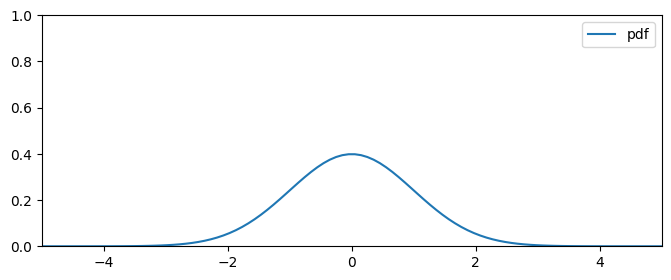

In [73]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
mu = 0
sigma = 1
plt.figure(figsize=(8,3))
plt.plot(x,st.norm.pdf(x, loc=mu, scale=sigma), label='pdf')
#plt.plot(x,st.norm.cdf(x, loc=mu, scale=sigma), label='cdf')
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])
plt.legend()
plt.show()

A distribuição Normal é simétrica em relação à sua média. Isso significa que, para qualquer número real $a$, temos que:

$$
P(X \leq \mu-a) = P(X \geq \mu+a)
$$

Vamos interpretar calmamente essa equação.

Partindo de $a=1$, na *pdf* da Normal desenhada acima (não precisa codar essa parte, somente encontrar no gráfico!)

1. Encontre $\mu$ no eixo x.
1. Encontre $\mu-a$ no eixo x.
1. Marque a área sob a *pdf* da Normal desenhada acima que corresponde a $P(X \leq \mu-a)$.
1. Encontre $\mu+a$ no eixo x.
1. Marque a área sob a *pdf* da Normal desenhada acima que corresponde a $P(X \leq \mu-a)$.



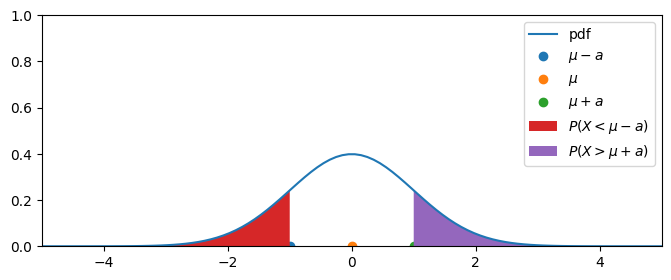

In [74]:
# Solução

# Se tudo deu certo, você marcou os seguintes pontos:

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
mu = 0
sigma = 1
a=1
plt.figure(figsize=(8,3))
plt.plot(x,st.norm.pdf(x, loc=mu, scale=sigma), label='pdf')
plt.scatter(mu-a, 0, label='$\mu-a$')
plt.scatter(mu, 0, label='$\mu$')
plt.scatter(mu+a, 0, label='$\mu+a$')
# Area 1
x_ = np.linspace(x[0], mu-a, 100)
plt.fill_between(x_,st.norm.pdf(x_, loc=mu, scale=sigma), 0, label='$P(X < \mu-a)$')

x_ = np.linspace(mu+a, x[-1], 100)
plt.fill_between(x_,st.norm.pdf(x_, loc=mu, scale=sigma), 0, label='$P(X > \mu+a)$')
#plt.plot(x,st.norm.cdf(x, loc=mu, scale=sigma), label='cdf')
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])
plt.legend()
plt.show()

# Exercício 4
*Objetivo: encontrar a probabilidade de estar tão ou mais distante da média*

Para uma Normal com média 100 e desvio padrão 10, encontre o número $a$ tal que:

$$
P(X \leq a \cup X \geq a) = 0.1
$$

Dica: Use a `ppf` e resolva primeiro para a metade da Normal à esquerda da média.

In [75]:
# Resolva aqui

In [76]:
# Solução (faça a sua antes de olhar!)

# P(X <= a) = 0.1/2 = 0.05
import scipy.stats as st
a = st.norm.ppf(0.05, loc=100, scale=10)
print(a)

83.55146373048527


# Exercício 5
*Objetivo: encontrar um intervalo de confiança*

Um intervalo de confiança é uma região simétrica em torno da média da Normal que acumula uma probabilidade escolhida.

No exercício anterior, calculamos $a$ tal que:

$$
P(X \leq a \cup X \geq a) = 0.1
$$

Por consequência:

$$
P(X \geq a \cap X \leq a) = 0.9
$$

Por isso, dizemos que $[\mu-a, \mu+a]$ é um *intervalo de confiança* de 90%.

Encontre o intervalo de confiança de 95% para uma Normal com $\mu=10$ e $\sigma^2=100$.


In [77]:
# Faça sua resposta aqui

In [78]:
# Solução (faça a sua antes de olhar!)

# P(X <= a) = 0.1/2 = 0.05
import scipy.stats as st
a = st.norm.ppf(0.025, loc=10, scale=100**0.5)
b = st.norm.ppf(1-0.025, loc=10, scale=100**0.5)
print(a,b)

-9.599639845400546 29.59963984540054


# Exercício 6
*Objetivo: analisar a relação entre o tamanho da amostra e o intervalo de confiança*

Vamos voltar para a nossa contagem de buracos na estrada.

Já vimos que nossa contagem de buracos em um trecho não é equivalente a encontrar o parâmetro $\lambda$ real da distribuição de buracos. Ao invés disso, temos uma amostra $\bar{x_n}$ que pode ser usada com o Teorema Central do Limite:

1. $\bar{X} = \frac{1}{N} \sum_{n=1}^{N} \bar{x_n}$
2. $\bar{X} \sim N\left(\mu,\frac{\sigma^2}{N}\right)$

Quer dizer que nós nunca poderemos conhecer o valor *real* de $\lambda$. Porém, podemos estimar a distribuição de $\bar{X}$ (que é o nosso parâmetro estimado $\hat{\lambda}$) usando a média de várias contagens de buracos em trechos da estrada (Equação 1).

Esse parâmetro estimado tem uma distribuição Normal com média e variância conhecidas (Equação 2). Com base nessa distribuição, podemos calcular um valor esperado (uma esperança, ou seja, a média do modelo $\mu$) e um *intervalo de confiança* para nossa estimativa.

Neste exercício:

1. Assumindo $\lambda$ real igual a 5, e que contamos buracos em 5 trechos da estrada, encontre um intervalo de confiança de 95% para o parâmetro estimado $\hat{\lambda}$.

2. Ao aumentar o número de trechos observados, o que acontece com o intervalo de confiança?

3. Quantos trechos é preciso observar para encontrar um intervalo de confianca de 95% menor que $0.5$ buraco para mais ou para menos (ou seja, um intervalo de tamanho total $1$?)


In [103]:
# Resolva seu exercício aqui
lambda_real = 5
numero_de_trechos = 5
mu = 0 # De acordo com o TLC... ideia: partir de st.poisson.mean()
sigma = 0 # De acordo com o TLC... ideia: partir de st.poisson.std()
c_min = 0 # 
c_max = 0 # 
intervalo_de_confianca = (c_min, c_max)

In [105]:
# Solução (uma das maneiras)
# 1.
import scipy.stats as st

lambda_real = 5
numero_de_trechos = 5
mu = st.poisson.mean(lambda_real) # De acordo com o TLC... ideia: partir de st.poisson.mean()
sigma = st.poisson.std(lambda_real)/(numero_de_trechos**0.5) # De acordo com o TLC... ideia: partir de st.poisson.std()
c_min = st.norm.ppf(0.025, loc=mu, scale=sigma)
c_max = st.norm.ppf(1-0.025, loc=mu, scale=sigma) 
intervalo_de_confianca = (c_min, c_max)
print(intervalo_de_confianca, c_max-c_min)

(3.0400360154599455, 6.959963984540054) 3.9199279690801085


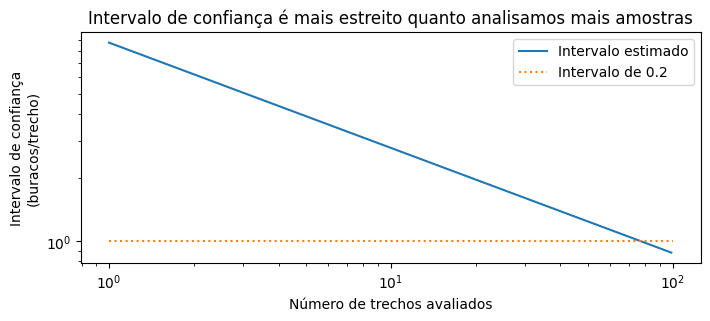

In [104]:
# 2. e 3.
import scipy.stats as st
import matplotlib.pyplot as plt

lambda_real = 5
tam_intervalo = []
for numero_de_trechos in range(1, 100):
    mu = st.poisson.mean(lambda_real)
    sigma = st.poisson.std(lambda_real)/(numero_de_trechos**0.5)
    c_min = st.norm.ppf(0.025, loc=mu, scale=sigma)
    c_max = st.norm.ppf(1-0.025, loc=mu, scale=sigma) 
    tam_intervalo.append(c_max-c_min)

plt.figure(figsize=(8,3))
plt.plot(range(1,100), tam_intervalo, label='Intervalo estimado')
plt.plot([1, 100], [1, 1], ':', label='Intervalo de 0.2')
plt.xticks(range(1,100,10))
plt.loglog()
plt.ylabel('Intervalo de confiança\n(buracos/trecho)')
plt.xlabel('Número de trechos avaliados')
plt.title('Intervalo de confiança é mais estreito quanto analisamos mais amostras')
plt.legend()
plt.show()

# Exercício 7
*Objetivo: analisar o significado do intervalo de confiança*

Das alternativas abaixo, quais são corretas sobre intervalos de confiança? Nas incorretas, encontre qual é o equívoco.

1. Um intervalo de confiança mais estreito significa que nossa estimativa foi mais precisa
2. O intervalo de confiança de 95% no caso do número de buracos significa o intervalo dentro do qual devemos encontrar 95% das nossas contagens de buracos ao longo da estrada
3. O intervalo de confiança de 95% significa que temos 95% de certeza que o parâmetro $\lambda$ está dentro do intervalo.
4. Se contarmos buracos em trechos de estrada suficientes, podemos chegar a estimar com certeza quase absoluta o número de buracos de um próximo trecho.
5. O intervalo de confiança diz respeito somente à média do número de buracos na estrada, que, nesse caso específico, é o parâmetro $\lambda$.
6. Nossa ideia de intervalo de confiança depende de conhecermos o desvio padrão do número de buracos na estrada, que só é conhecido porque assumimos que os buracos se distribuem usando uma distribuição de Poisson. Se essa suposição não se confirmar, todos os resultados seguintes estarão errados.



Solução (não olhe aqui antes de fazer o seu!)

1. Correto
2. Errado. O intervalo de confiança se refere somente ao parâmetro $\lambda$, mas os buracos ainda se distribuem segundo uma distribuição Poisson.
3. Correto
4. Errado. O intervalo de confiança se refere somente ao parâmetro $\lambda$, mas os buracos ainda se distribuem segundo uma distribuição Poisson. Um intervalo mais estreito significa que temos uma estimativa mais robusta de nossa própria incerteza em relação a isso.
5. Correto.
6. Correto, e isso é um problema que vamos abordar no futuro próximo.


# Apêndices / coisas extras

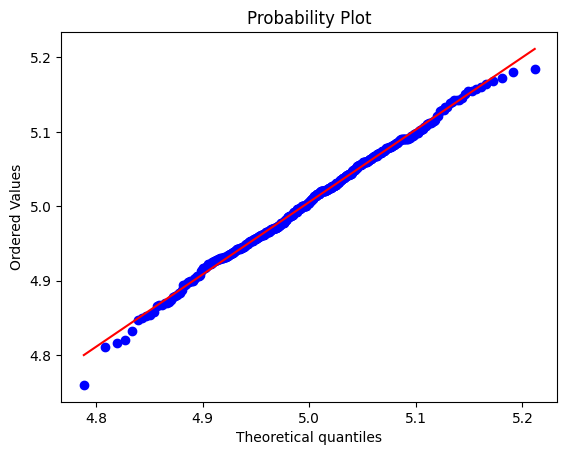

(0.9722493672100672, 0.14455316394966466, 0.9984873610429553)


In [111]:
## QQ-plot mostrando como o TCL funciona

import scipy.stats as stats
import matplotlib.pyplot as plt

lambda_real = 5
numero_de_trechos = 1000
n_estimativas = 500
mu = st.poisson.mean(lambda_real) # De acordo com o TLC... ideia: partir de st.poisson.mean()
sigma = st.poisson.std(lambda_real)/np.sqrt(numero_de_trechos) 
estimativas = []
for _ in range(n_estimativas):    
    contagens = stats.poisson.rvs(lambda_real, size=numero_de_trechos) # Observei varios trechos da estrada
    estimativa_media = contagens.mean()
    estimativas.append(estimativa_media)

data, fit = st.probplot(estimativas, dist=st.norm(loc=mu, scale=sigma), plot=plt)
plt.show()
print(fit)